In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.multiclass import (
    OneVsOneClassifier,
    OneVsRestClassifier,
    OutputCodeClassifier,
)
from sklearn.tree import DecisionTreeClassifier


class DataLoader:
    def __init__(self):
        pass
    
    def load_data(self):
        with open("/workspace/unicamp/IA048/Exercise_Linear_Classification/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/features.txt", "r") as f:
            lines = f.readlines()
        cols = [line.split(" ")[1].strip() for line in lines]
        X_train = pd.read_csv("data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
        y_train = pd.read_csv("data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
        X_test = pd.read_csv("data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
        y_test = pd.read_csv("data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)
    
        # X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=42, stratify=y_train_data)
        X_train.columns = cols
        X_test.columns = cols
        y_train.columns = ["activity-label"]
        y_test.columns = ["activity-label"]

        return X_train, y_train, X_test, y_test

class ClassifierTrainer:
    def __init__(self, classifier, cv_folds=5):
        self.classifier = classifier
        self.cv_folds = cv_folds
        self.scores = {}
    
    def cross_validate_model(self, X, y):
        scoring = {'accuracy': 'accuracy',
                   'precision': make_scorer(precision_score, average='weighted'),
                   'recall': make_scorer(recall_score, average='weighted'),
                   'f1': make_scorer(f1_score, average='weighted')}
        self.scores = cross_validate(self.classifier, X, y, cv=self.cv_folds, scoring=scoring, return_train_score=True)
        return self.scores

    def print_scores(self):
        for metric, values in self.scores.items():
            print(f"{metric}: Mean={np.mean(values):.3f}, Std={np.std(values):.3f}")

### Primeira parte
Primeiramente, ser ́a explorada uma vers ̃ao do conjunto de dados na qual j ́a houve pr ́e-processamento e extra ̧c ̃ao
de caracter ́ısticas. No caso, cada amostra cont ́em 561 atributos derivados de uma mesma janela de 2,56 s dos 6
sinais dispon ́ıveis (ACC: x,y,z; GYR: x,y,z), considerando suas representa ̧c ̃oes tanto no dom ́ınio do tempo quanto
no dom ́ınio da frequˆencia.

Construa uma solu ̧c ̃ao para este problema baseada no modelo de regress ̃ao log ́ıstica. Descreva a abordagem
escolhida para resolvˆe-lo (softmax, classificadores bin ́arios combinados em um esquema um-contra-um ou
um-contra-todos). Obtenha, ent ̃ao, a matriz de confus ̃ao para o classificador considerando os dados do
conjunto de teste. Al ́em disso, adote uma m ́etrica global para a avalia ̧c ̃ao do desempenho (m ́edio) deste
classificador. Discuta os resultados obtidos.

In [13]:
loader = DataLoader()
X_train, y_train, X_test, y_test = loader.load_data()

In [72]:
# Load data
loader = DataLoader()
X_train, y_train, X_test, y_test = loader.load_data()

# Instantiate trainer and classifiers
ovo_trainer = ClassifierTrainer(OneVsOneClassifier(LogisticRegression(max_iter=1000)), cv_folds=10)
ova_trainer = ClassifierTrainer(LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=1000), cv_folds=10)
softmax_trainer = ClassifierTrainer(LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000), cv_folds=10)

# Cross-validate models
ovo_scores = ovo_trainer.cross_validate_model(X_train, y_train)
ova_scores = ova_trainer.cross_validate_model(X_train, y_train)
softmax_scores = softmax_trainer.cross_validate_model(X_train, y_train)

# Print results
print("One-vs-One Performance:")
ovo_trainer.print_scores()
print()

print("One-vs-All Performance:")
ova_trainer.print_scores()
print()

print("Softmax Performance:")
softmax_trainer.print_scores()


/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was e

One-vs-One Performance:
fit_time: Mean=1.969, Std=0.810
score_time: Mean=0.114, Std=0.091
test_accuracy: Mean=0.947, Std=0.045
train_accuracy: Mean=0.992, Std=0.001
test_precision: Mean=0.955, Std=0.031
train_precision: Mean=0.992, Std=0.001
test_recall: Mean=0.947, Std=0.045
train_recall: Mean=0.992, Std=0.001
test_f1: Mean=0.946, Std=0.046
train_f1: Mean=0.992, Std=0.001

One-vs-All Performance:
fit_time: Mean=4.271, Std=0.804
score_time: Mean=0.047, Std=0.011
test_accuracy: Mean=0.948, Std=0.047
train_accuracy: Mean=0.991, Std=0.001
test_precision: Mean=0.956, Std=0.033
train_precision: Mean=0.991, Std=0.001
test_recall: Mean=0.948, Std=0.047
train_recall: Mean=0.991, Std=0.001
test_f1: Mean=0.947, Std=0.049
train_f1: Mean=0.991, Std=0.001

Softmax Performance:
fit_time: Mean=7.625, Std=2.286
score_time: Mean=0.054, Std=0.025
test_accuracy: Mean=0.948, Std=0.047
train_accuracy: Mean=0.993, Std=0.001
test_precision: Mean=0.956, Std=0.032
train_precision: Mean=0.993, Std=0.001
test_re

In [82]:

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)

logistic_regressor = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
ovo_tree = OneVsOneClassifier(logistic_regressor)
ovr_logistic_regressor = OneVsRestClassifier(logistic_regressor)
# ecoc = OutputCodeClassifier(logistic_regressor, code_size=2)

cv_results_logistic_regressor = cross_validate(logistic_regressor, X_train, y_train, cv=cv, n_jobs=2)
cv_results_ovo = cross_validate(ovo_tree, X_train, y_train, cv=cv, n_jobs=2)
cv_results_ovr = cross_validate(ovr_logistic_regressor, X_train, y_train, cv=cv, n_jobs=2)
# cv_results_ecoc = cross_validate(ecoc, X_train, y_train, cv=cv, n_jobs=2)

/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was e

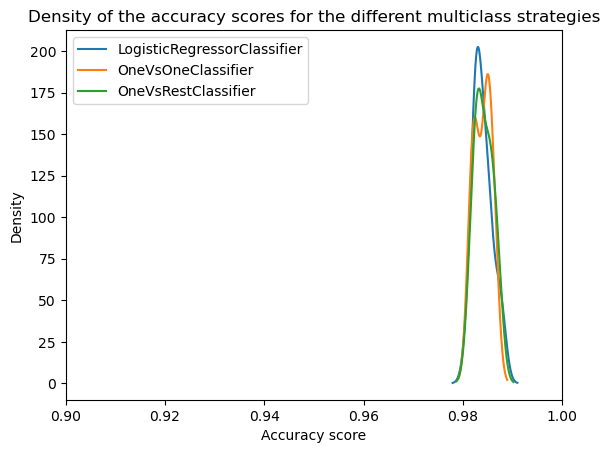

In [86]:
from matplotlib import pyplot as plt

scores = pd.DataFrame(
    {
        "LogisticRegressorClassifier": cv_results_logistic_regressor["test_score"],
        "OneVsOneClassifier": cv_results_ovo["test_score"],
        "OneVsRestClassifier": cv_results_ovr["test_score"],
        # "OutputCodeClassifier": cv_results_ecoc["test_score"],
    }
)
ax = scores.plot.kde(legend=True)
ax.set_xlabel("Accuracy score")
ax.set_xlim([0.9, 1])
_ = ax.set_title(
    "Density of the accuracy scores for the different multiclass strategies"
)

#### I chose LogisticRegression (softmax)

Doing GRIDSEARCH to tune hyperparams

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model
logistic_regressor = LogisticRegression(multi_class="multinomial", max_iter=1000)

# # Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Regularization strength
#     'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],  # Algorithms to use in the optimization problem
#     'penalty': ['l2']  # As some solvers only support l2 penalties
# }

param_grid = {
    'C': [10],  # Regularization strength
    'solver': ['saga'],  # Algorithms to use in the optimization problem
    'penalty': ['l2']  # As some solvers only support l2 penalties
}

# Setup the grid search with cross-validation
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)
grid_search = GridSearchCV(logistic_regressor, param_grid, cv=cv, n_jobs=2, scoring='accuracy')

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/anaconda3/envs/learn/lib/python3.10/site-packages/skle

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation accuracy: 0.9840044740866563


/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


results: Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
Best cross-validation accuracy: 0.984140495202569

In [19]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
conf_matrix = confusion_matrix(y_pred, y_test)

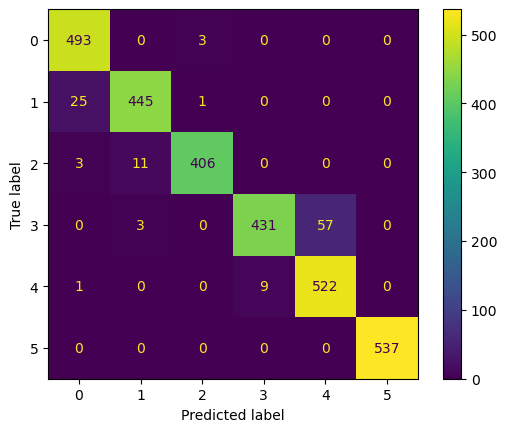

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [22]:
cm

array([[493,   0,   3,   0,   0,   0],
       [ 25, 445,   1,   0,   0,   0],
       [  3,  11, 406,   0,   0,   0],
       [  0,   3,   0, 431,  57,   0],
       [  1,   0,   0,   9, 522,   0],
       [  0,   0,   0,   0,   0, 537]])

### ITEM B

Considere, agora, a t ́ecnica k-nearest neighbors (kNN). Adotando um esquema de valida ̧c ̃ao cruzada, mostre
como o desempenho do classificador, computado com a mesma m ́etrica adotada no item a)) varia em fun ̧c ̃ao
do parˆametro k. Escolhendo, ent ̃ao, o melhor valor para k, apresente a matriz de confus ̃ao para os dados de
teste e o desempenho medido nesse conjunto. Comente os resultados obtidos, inclusive estabelecendo uma
compara ̧c ̃ao com o desempenho da regress ̃ao log ́ıstica.

/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array 

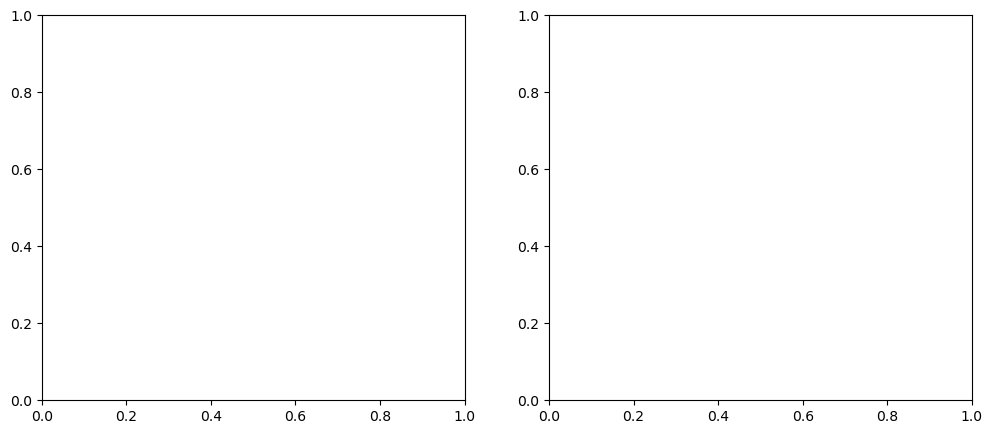

In [137]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Define the model
knn_clf = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)

accuracies = []
for k in range(1, 26):
    result = {"k":k}
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    cv_results_knn = cross_validate(knn_clf, X_train, y_train, cv=cv)
    result["accuracy"] = cv_results_knn["test_score"].mean()
    accuracies.append(result)

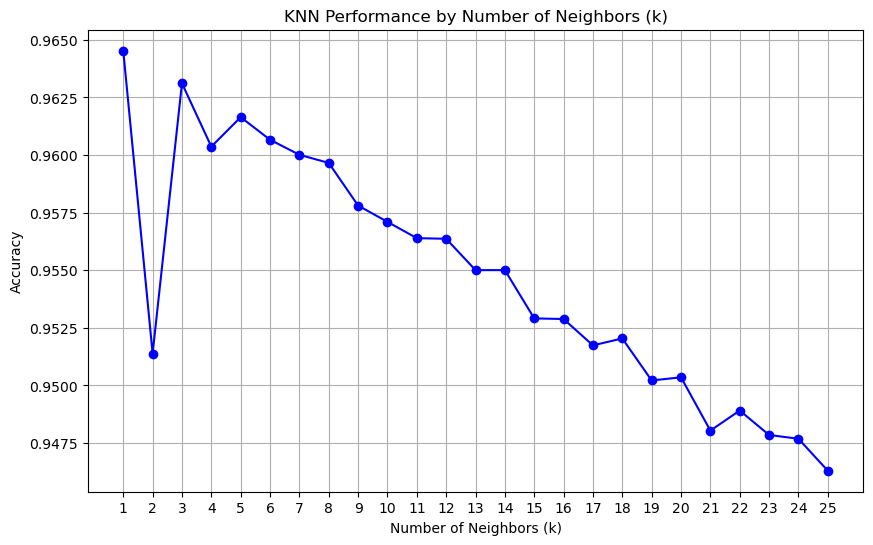

In [138]:
# Extracting k values and their corresponding accuracies
k_values = [item['k'] for item in accuracies]
accuracies = [item['accuracy'] for item in accuracies]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Performance by Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)  # Ensure all k values are marked
plt.show()

In [139]:
# Define the model
knn_clf = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)
param_grid = {
    "n_neighbors": [1],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

grid_search = GridSearchCV(knn_clf, param_grid=param_grid, cv=cv, scoring="accuracy", verbose=1)

grid_search.fit(X_train, y_train)

best_model_knn = grid_search.best_estimator_
best_params_knn = grid_search.best_params_
best_score_knn = grid_search.best_score_

print("Best parameters:", best_params_knn)
print("Best score:", best_score_knn)

Fitting 15 folds for each of 6 candidates, totalling 90 fits


/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array 

Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best score: 0.978998925886144


/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best score: 0.978998925886144

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1, weights="uniform", metric="manhattan")

knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
conf_matrix = confusion_matrix(y_pred, y_test)

/root/anaconda3/envs/learn/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [27]:
conf_matrix

array([[475,  39,  33,   0,   0,   0],
       [ 11, 424,  55,   1,   0,   0],
       [ 10,   8, 332,   0,   0,   0],
       [  0,   0,   0, 383,  62,   2],
       [  0,   0,   0, 106, 470,   0],
       [  0,   0,   0,   1,   0, 535]])

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = best_model_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

NameError: name 'best_model_knn' is not defined

In [28]:
cm

array([[493,   0,   3,   0,   0,   0],
       [ 25, 445,   1,   0,   0,   0],
       [  3,  11, 406,   0,   0,   0],
       [  0,   3,   0, 431,  57,   0],
       [  1,   0,   0,   9, 522,   0],
       [  0,   0,   0,   0,   0, 537]])